In [64]:
import os
import pandas as pd
import random

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [ ]:
# Check if gpu is being used

In [2]:
tf.config.list_physical_devices('GPU') 

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [36]:
def plot_loss_curves(history):
    
    train_loss = history.history['loss']
    train_accuracy = history.history['accuracy']
    
    val_loss = history.history['val_loss']
    val_accuracy = history.history['val_accuracy']
    
    epochs = range(len(train_loss))
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1,2,1)
    plt.plot(epochs, train_loss, label='Train loss')
    plt.plot(epochs, val_loss, label='Val loss')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend()
               
    plt.subplot(1,2,2)
    plt.plot(epochs, train_accuracy, label='Train accuracy')
    plt.plot(epochs, val_accuracy, label='Val accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()
    plt.show()

# Load all data

In [21]:
train_dir = 'Data/train'
val_dir = 'Data/val'
test_dir = 'Data/test'

In [22]:
train_datagen = ImageDataGenerator(rescale=(1/255.),
                                   rotation_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=(1/255.),
                                 rotation_range=0.2,
                                 zoom_range=0.2,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2, 
                                 horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=(1/255.))

In [5]:
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary')

val_data = val_datagen.flow_from_directory(
    directory=val_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary')

test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 302 images belonging to 2 classes.
Found 440 images belonging to 2 classes.


# Visualize data

In [65]:
def plot_random_image(target_dir, target_class):

    #setup the target folder
    target_folder = target_dir + '/' + target_class

    #Get random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    #Read in the image and plot it
    img = mpimg.imread(target_folder + '/' + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f'Image shape:{img.shape}')


Image shape:(1051, 1364)
Image shape:(560, 880)


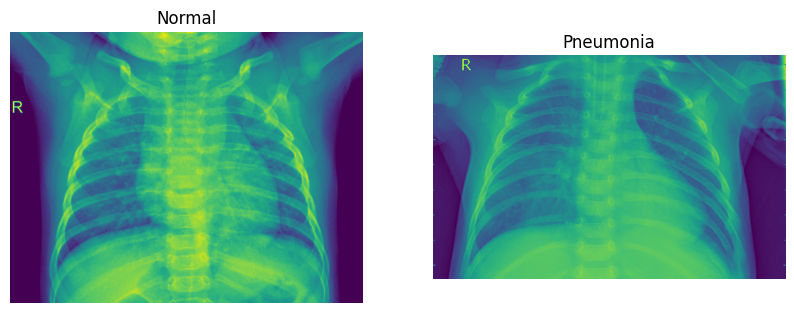

In [69]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plot_random_image(train_dir, 'Normal')
plt.subplot(1,2,2)
plot_random_image(train_dir, 'Pneumonia')

# CNN model training

In [6]:
# Create a model
model_1 = Sequential([
    Conv2D(filters=10,input_shape=(224,224,3), kernel_size=3 ,activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(filters=10, kernel_size=2 ,activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

#Compile the model
model_1.compile(loss='binary_crossentropy',
               optimizer=Adam(learning_rate=0.001),
               metrics=['accuracy'])

#Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                       validation_data=val_data,
                       validation_steps=len(val_data))

Epoch 1/5
163/163 [==============================] - 101s 598ms/step - loss: 0.4367 - accuracy: 0.7928 - val_loss: 0.6251 - val_accuracy: 0.6854
Epoch 2/5
163/163 [==============================] - 66s 402ms/step - loss: 0.2878 - accuracy: 0.8765 - val_loss: 0.5070 - val_accuracy: 0.8079
Epoch 3/5
163/163 [==============================] - 65s 399ms/step - loss: 0.2812 - accuracy: 0.8733 - val_loss: 0.5094 - val_accuracy: 0.8179
Epoch 4/5
163/163 [==============================] - 60s 368ms/step - loss: 0.2548 - accuracy: 0.8903 - val_loss: 0.5660 - val_accuracy: 0.7947
Epoch 5/5
163/163 [==============================] - 60s 365ms/step - loss: 0.2594 - accuracy: 0.8951 - val_loss: 0.4732 - val_accuracy: 0.8377


# CNN model evaluation

In [37]:
#evaluate the model
model_1.evaluate(test_data)

14/14 [==============================] - 2s 163ms/step - loss: 0.3345 - accuracy: 0.8614


[0.3345419764518738, 0.8613636493682861]

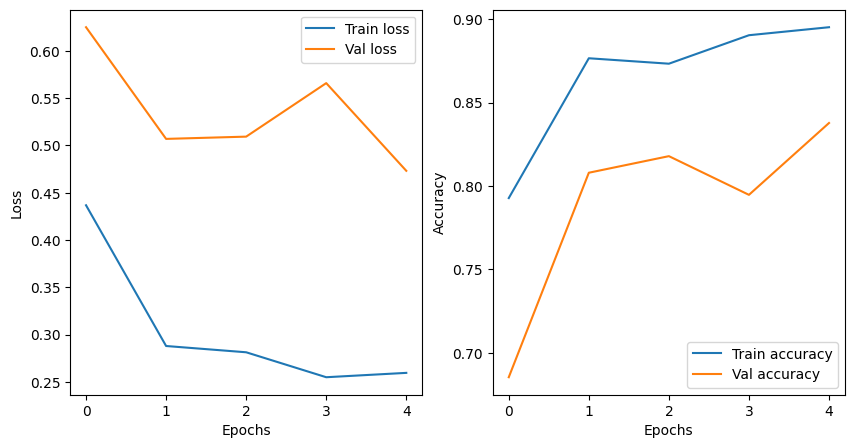

In [38]:
# Visualize our loss curves
plot_loss_curves(history_1)

# Trying to improve our model (training for longer and add some more filters with same model as above)

In [50]:
# Create a model
model_2 = Sequential([
    Conv2D(filters=20,input_shape=(224,224,3), kernel_size=3 ,activation='relu'),
    MaxPool2D(pool_size=4),
    Conv2D(filters=20, kernel_size=2 ,activation='relu'),
    MaxPool2D(pool_size=4),
    Flatten(),
    Dense(1, activation='sigmoid')
])

#Compile the model
model_2.compile(loss='binary_crossentropy',
               optimizer=Adam(learning_rate=0.001),
               metrics=['accuracy'])

#Fit the model
history_2 = model_2.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                       validation_data=val_data,
                       validation_steps=len(val_data))

Epoch 1/10
163/163 [==============================] - 59s 359ms/step - loss: 0.4778 - accuracy: 0.7765 - val_loss: 0.4857 - val_accuracy: 0.7649
Epoch 2/10
163/163 [==============================] - 57s 350ms/step - loss: 0.3303 - accuracy: 0.8482 - val_loss: 0.5029 - val_accuracy: 0.8113
Epoch 3/10
163/163 [==============================] - 58s 356ms/step - loss: 0.3032 - accuracy: 0.8687 - val_loss: 0.5935 - val_accuracy: 0.7881
Epoch 4/10
163/163 [==============================] - 59s 360ms/step - loss: 0.2795 - accuracy: 0.8748 - val_loss: 0.4304 - val_accuracy: 0.8576
Epoch 5/10
163/163 [==============================] - 57s 352ms/step - loss: 0.2769 - accuracy: 0.8800 - val_loss: 0.5162 - val_accuracy: 0.8245
Epoch 6/10
163/163 [==============================] - 58s 353ms/step - loss: 0.2460 - accuracy: 0.8978 - val_loss: 0.4569 - val_accuracy: 0.8411
Epoch 7/10
163/163 [==============================] - 58s 354ms/step - loss: 0.2561 - accuracy: 0.8913 - val_loss: 0.5016 - val_ac

In [51]:
#evaluate the model
model_2.evaluate(test_data)

14/14 [==============================] - 2s 174ms/step - loss: 0.2717 - accuracy: 0.8886


[0.271663635969162, 0.8886363506317139]

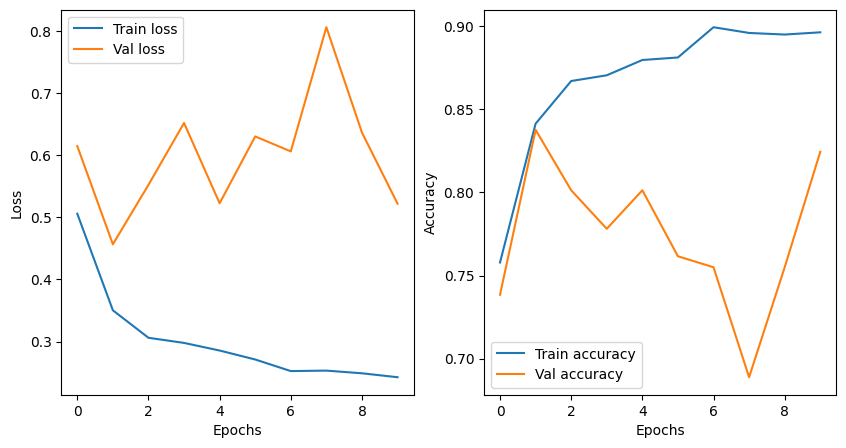

In [74]:
# Visualize our loss curves
plot_loss_curves(history_2)

In [48]:
# Create a model
model_3= Sequential([
    Conv2D(filters=32,input_shape=(224,224,3), kernel_size=3 ,activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(filters=32, kernel_size=2 ,activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

#Compile the model
model_3.compile(loss='binary_crossentropy',
               optimizer=Adam(learning_rate=0.001),
               metrics=['accuracy'])

#Fit the model
history_3 = model_3.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                       validation_data=val_data,
                       validation_steps=len(val_data))

Epoch 1/10
163/163 [==============================] - 60s 361ms/step - loss: 0.5058 - accuracy: 0.7579 - val_loss: 0.6146 - val_accuracy: 0.7384
Epoch 2/10
163/163 [==============================] - 59s 360ms/step - loss: 0.3503 - accuracy: 0.8414 - val_loss: 0.4565 - val_accuracy: 0.8377
Epoch 3/10
163/163 [==============================] - 59s 361ms/step - loss: 0.3061 - accuracy: 0.8671 - val_loss: 0.5522 - val_accuracy: 0.8013
Epoch 4/10
163/163 [==============================] - 59s 360ms/step - loss: 0.2978 - accuracy: 0.8706 - val_loss: 0.6518 - val_accuracy: 0.7781
Epoch 5/10
163/163 [==============================] - 59s 361ms/step - loss: 0.2855 - accuracy: 0.8798 - val_loss: 0.5226 - val_accuracy: 0.8013
Epoch 6/10
163/163 [==============================] - 59s 360ms/step - loss: 0.2711 - accuracy: 0.8813 - val_loss: 0.6301 - val_accuracy: 0.7616
Epoch 7/10
163/163 [==============================] - 59s 360ms/step - loss: 0.2524 - accuracy: 0.8995 - val_loss: 0.6061 - val_ac

In [71]:
#evaluate the model
loss_3, accuracy_3 = model_3.evaluate(test_data)

14/14 [==============================] - 2s 151ms/step - loss: 0.2717 - accuracy: 0.8886


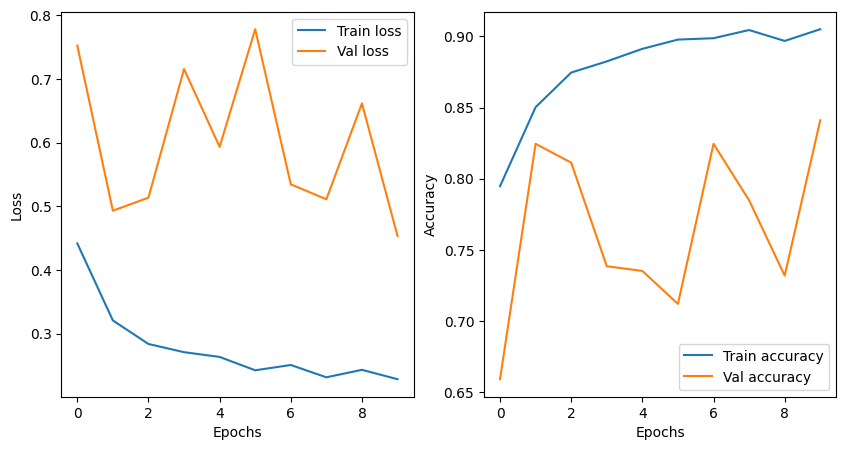

In [47]:
# Visualize our loss curves
plot_loss_curves(history_3)

# Let's try a model same as above (model_2) with 20 filters and some more convolutional layers

In [57]:
# Create a model
model_4 = Sequential([
    Conv2D(filters=20,input_shape=(224,224,3), kernel_size=3 ,activation='relu'),
    MaxPool2D(pool_size=4),
    Conv2D(filters=20, kernel_size=2 ,activation='relu'),
    MaxPool2D(pool_size=4),
    Conv2D(filters=20, kernel_size=2 ,activation='relu'),
    MaxPool2D(pool_size=4),
    Flatten(),
    Dense(1, activation='sigmoid')
])

#Compile the model
model_4.compile(loss='binary_crossentropy',
               optimizer=Adam(learning_rate=0.001),
               metrics=['accuracy'])

#Fit the model
history_4 = model_4.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                       validation_data=val_data,
                       validation_steps=len(val_data))

Epoch 1/10
163/163 [==============================] - 61s 372ms/step - loss: 0.5499 - accuracy: 0.7464 - val_loss: 0.5478 - val_accuracy: 0.6854
Epoch 2/10
163/163 [==============================] - 59s 362ms/step - loss: 0.3736 - accuracy: 0.8292 - val_loss: 0.7054 - val_accuracy: 0.6921
Epoch 3/10
163/163 [==============================] - 60s 366ms/step - loss: 0.3379 - accuracy: 0.8426 - val_loss: 0.4937 - val_accuracy: 0.8079
Epoch 4/10
163/163 [==============================] - 61s 375ms/step - loss: 0.3104 - accuracy: 0.8593 - val_loss: 0.6673 - val_accuracy: 0.7318
Epoch 5/10
163/163 [==============================] - 59s 360ms/step - loss: 0.2971 - accuracy: 0.8673 - val_loss: 0.6014 - val_accuracy: 0.7682
Epoch 6/10
163/163 [==============================] - 60s 364ms/step - loss: 0.2810 - accuracy: 0.8752 - val_loss: 0.5101 - val_accuracy: 0.8079
Epoch 7/10
163/163 [==============================] - 60s 370ms/step - loss: 0.2713 - accuracy: 0.8796 - val_loss: 0.4450 - val_ac

In [56]:
#Evaluate the model
model_4.evaluate(test_data)

14/14 [==============================] - 2s 152ms/step - loss: 0.3582 - accuracy: 0.8205


[0.3582073152065277, 0.8204545378684998]

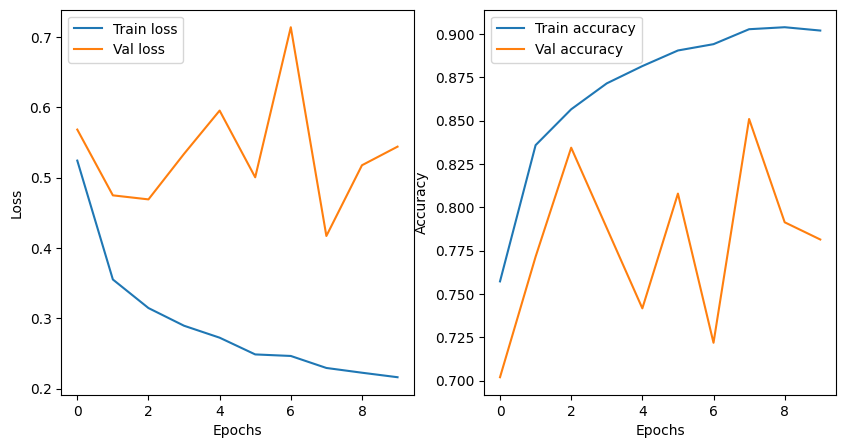

In [55]:
# Visualize our loss curves
plot_loss_curves(history_4)

# Conclusion

### Model_3 was the best model with an accuracy of almost 89%.

In [75]:
#Model_3 accuracy and loss values
print(f'Model_3 accuracy:{loss_3}\nModel_3 loss:{accuracy_3}')

Model_3 accuracy:0.2716636061668396
Model_3 loss:0.8886363506317139


In [76]:
# Visualize model_3 summary
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 20)      560       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 55, 55, 20)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 54, 54, 20)        1620      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 13, 13, 20)       0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 3380)              0         
                                                                 
 dense_6 (Dense)             (None, 1)                